In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 30 # avoids to display the full dataframe
from download import download

In [2]:
#url2 = "https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv"
url = "https://www.data.gouv.fr/en/datasets/r/0b66ca39-1623-4d9c-83ad-5434b7f9e2a4"
path_target = "./chiffres-cles.csv"
download(url, path_target, replace=True)

# df: data frame
df_covid = pd.read_csv("chiffres-cles.csv")


file_sizes: 100%|██████████████████████████| 6.27M/6.27M [00:02<00:00, 2.49MB/s]
Successfully downloaded file to ./chiffres-cles.csv
C:\Users\quenf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_covid.columns # column names

Index(['date', 'granularite', 'maille_code', 'maille_nom', 'cas_confirmes',
       'cas_ehpad', 'cas_confirmes_ehpad', 'cas_possibles_ehpad', 'deces',
       'deces_ehpad', 'reanimation', 'hospitalises',
       'nouvelles_hospitalisations', 'nouvelles_reanimations', 'gueris',
       'depistes', 'source_nom', 'source_url', 'source_archive',
       'source_type'],
      dtype='object')

In [4]:
import datetime

date = df_covid['date']
print(date)

a = list((date[:]))

b = list(map(lambda x: datetime.date(int(x[:4]),int(x[5:7]), int(x[8:])).\
    isoformat(),a))

b = pd.DatetimeIndex(b)

df_covid.loc[:, 'date'] = b
df_covid = df_covid.set_index('date')

df_covid

0        2020-01-01
1        2020-01-07
2        2020-01-08
3        2020-01-16
4        2020-01-17
            ...    
47409    2021-03-18
47410    2021-03-18
47411    2021-03-18
47412    2021-03-18
47413    2021-03-18
Name: date, Length: 47414, dtype: object


,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
date,,,,,,,,,,,,,,,,,,,
2020-01-01,pays,FRA,France,NaN,NaN,NaN,NaN,44985.0,19780.0,NaN,24296.0,NaN,NaN,194901.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
2020-01-07,pays,FRA,France,2727321.0,NaN,149671.0,NaN,46539.0,20302.0,2582.0,24521.0,1438.0,180.0,200079.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
2020-01-08,pays,FRA,France,NaN,NaN,NaN,NaN,46815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
2020-01-16,pays,FRA,France,2894347.0,NaN,159791.0,NaN,48783.0,21359.0,2741.0,25019.0,1197.0,188.0,209056.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
2020-01-17,pays,FRA,France,2910989.0,NaN,159791.0,NaN,48924.0,21359.0,2776.0,25269.0,697.0,136.0,209343.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-18,region,REG-75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,3034.0,NaN,198.0,1155.0,69.0,16.0,12285.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-18,region,REG-76,Occitanie,NaN,NaN,NaN,NaN,3430.0,NaN,266.0,1349.0,61.0,13.0,15414.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-18,region,REG-84,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,9582.0,NaN,444.0,3012.0,135.0,29.0,39384.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


In [5]:
df_covid.shape # dimensions

(47294, 19)

In [5]:
df_covid.tail(25) # last 25 rows

,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
date,,,,,,,,,,,,,,,,,,,
2021-03-18,departement,DEP-95,Val-d'Oise,NaN,NaN,NaN,NaN,1547.0,NaN,58.0,519.0,58.0,2.0,6600.0,NaN,Santé publique France Data,NaN,NaN,sante-publique-france-data
2021-03-18,departement,DEP-971,Guadeloupe,NaN,NaN,NaN,NaN,183.0,NaN,11.0,38.0,7.0,1.0,867.0,NaN,Santé publique France Data,NaN,NaN,sante-publique-france-data
2021-03-18,departement,DEP-972,Martinique,NaN,NaN,NaN,NaN,49.0,NaN,7.0,27.0,5.0,1.0,421.0,NaN,Santé publique France Data,NaN,NaN,sante-publique-france-data
2021-03-18,departement,DEP-973,Guyane,NaN,NaN,NaN,NaN,84.0,NaN,9.0,18.0,2.0,2.0,2245.0,NaN,Santé publique France Data,NaN,NaN,sante-publique-france-data
2021-03-18,departement,DEP-974,La Réunion,NaN,NaN,NaN,NaN,100.0,NaN,54.0,160.0,18.0,3.0,1046.0,NaN,Santé publique France Data,NaN,NaN,sante-publique-france-data
2021-03-18,departement,DEP-976,Mayotte,NaN,NaN,NaN,NaN,105.0,NaN,21.0,89.0,5.0,0.0,1120.0,NaN,Santé publique France Data,NaN,NaN,sante-publique-france-data
2021-03-18,pays,FRA,France,NaN,NaN,NaN,NaN,66274.0,NaN,4246.0,25389.0,1661.0,382.0,278263.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-18,region,REG-01,Guadeloupe,NaN,NaN,NaN,NaN,183.0,NaN,11.0,38.0,7.0,1.0,867.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-18,region,REG-02,Martinique,NaN,NaN,NaN,NaN,49.0,NaN,7.0,27.0,5.0,1.0,421.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


In [6]:
# new dataframe with rows grouped by granularity
df_covid_2 = df_covid.groupby('granularite')

In [200]:
df_covid_2.tail(20)

,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
date,,,,,,,,,,,,,,,,,,,
2020-03-16,monde,WORLD,Monde,167414.0,NaN,NaN,NaN,6507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200316193700/htt...,sante-publique-france
2020-03-17,monde,WORLD,Monde,180160.0,NaN,NaN,NaN,7103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200317191451/htt...,sante-publique-france
2020-03-17,monde,WORLD,Monde,190000.0,NaN,NaN,NaN,7500.0,NaN,NaN,NaN,NaN,NaN,80000.0,NaN,Ministère des Solidarités et de la Santé,https://www.dailymotion.com/video/x7srn0c,NaN,ministere-sante
2020-03-18,monde,WORLD,Monde,194213.0,NaN,NaN,NaN,7869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Santé publique France,https://www.santepubliquefrance.fr/maladies-et...,https://web.archive.org/web/20200318184308/htt...,sante-publique-france
2020-03-18,monde,WORLD,Monde,212000.0,NaN,NaN,NaN,8724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ministère des Solidarités et de la Santé,https://www.dailymotion.com/video/x7ssjki,NaN,ministere-sante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,region,REG-75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,2993.0,NaN,201.0,1148.0,77.0,18.0,12109.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-15,region,REG-76,Occitanie,NaN,NaN,NaN,NaN,3397.0,NaN,277.0,1362.0,94.0,27.0,15197.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-15,region,REG-84,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,9475.0,NaN,445.0,3168.0,215.0,44.0,38873.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


In [22]:
# only data concerning the whole France
df_country = df_covid.loc[df_covid['granularite']=='pays']
df_country = df_country[~df_country.index.duplicated(keep='first')]

In [10]:
df_country.tail()

,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
date,,,,,,,,,,,,,,,,,,,
2021-03-13,pays,FRA,France,NaN,NaN,NaN,NaN,64978.0,NaN,4070.0,24671.0,1087.0,263.0,272615.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-14,pays,FRA,France,NaN,NaN,NaN,NaN,65118.0,NaN,4127.0,24989.0,821.0,188.0,272960.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-15,pays,FRA,France,NaN,NaN,NaN,NaN,65451.0,NaN,4219.0,25469.0,1676.0,401.0,273771.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-16,pays,FRA,France,NaN,NaN,NaN,NaN,65765.0,NaN,4239.0,25492.0,2005.0,435.0,275360.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
2021-03-17,pays,FRA,France,NaN,NaN,NaN,NaN,66006.0,NaN,4219.0,25314.0,1745.0,357.0,276993.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


In [11]:
cas = df_country['cas_confirmes']['2020-01-24':].dropna()

<AxesSubplot:xlabel='date'>

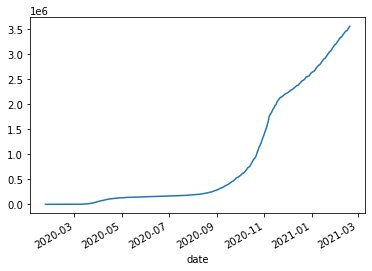

In [13]:
cas.plot()

In [14]:
cas.index

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-02', '2020-02-03',
               ...
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19'],
              dtype='datetime64[ns]', name='date', length=386, freq=None)

In [15]:
deces = df_country['deces']['2020-01-24':].dropna()

<AxesSubplot:xlabel='date'>

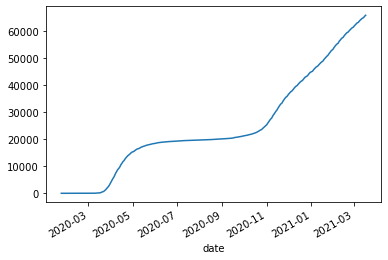

In [16]:
deces.plot()

In [17]:
reanimations = df_country['reanimation']['2020-01-24':].dropna()

<AxesSubplot:xlabel='date'>

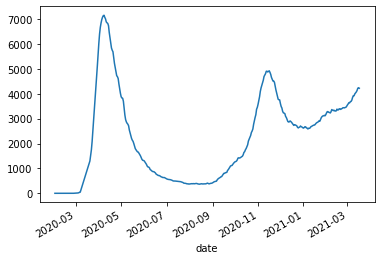

In [18]:
reanimations.plot()

In [19]:
max(cas['2020-11'])

2222488.0

<AxesSubplot:xlabel='date'>

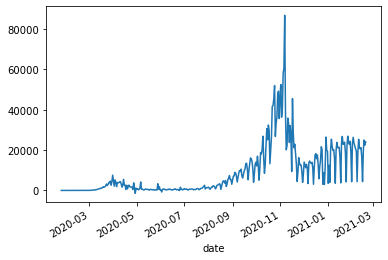

In [20]:
cas.diff().plot()